<font size =5> Firth's Bias-Reduced Logistic <font> <br>


In [1]:
#Load data and packages
library(dplyr)
library(ggplot2)

df <- read.csv("loan_dataset.csv")
head(df)

options(
  digits = 2,
  scipen = 999
)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
1,Male,Yes,1,Graduate,No,4583,128,360,1,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,66,360,1,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,120,360,1,Urban,1
4,Male,No,0,Graduate,No,6000,141,360,1,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,267,360,1,Urban,1
6,Male,Yes,0,Not Graduate,No,2333,95,360,1,Urban,1


**Fit a model using standard maximum likelihood estimation**

In [2]:
glm_model <- glm(Loan_Status ~ .,
                 data = df,
                 family = binomial()
                 )
summary(glm_model)


Call:
glm(formula = Loan_Status ~ ., family = binomial(), data = df)

Coefficients:
                         Estimate Std. Error z value            Pr(>|z|)    
(Intercept)            -2.4532091  0.9280304   -2.64              0.0082 ** 
GenderMale              0.2638986  0.3264294    0.81              0.4188    
MarriedYes              0.5753191  0.2923975    1.97              0.0491 *  
Dependents1            -0.3533445  0.3454939   -1.02              0.3064    
Dependents2             0.2752209  0.3776846    0.73              0.4662    
Dependents3+            0.2099876  0.4840827    0.43              0.6644    
EducationNot Graduate  -0.3913936  0.3018264   -1.30              0.1947    
Self_EmployedYes       -0.1575952  0.3515472   -0.45              0.6539    
ApplicantIncome         0.0000149  0.0000267    0.56              0.5786    
LoanAmount             -0.0032332  0.0017104   -1.89              0.0587 .  
Loan_Amount_Term       -0.0008775  0.0020236   -0.43              0.

**Fit your model again using bias reduction**


In [3]:
pl_model <- brglm::brglm(
  formula = Loan_Status ~ .,
  data = df,
  family = binomial(),
  pl = TRUE
)

summary(pl_model)


Call:
brglm::brglm(formula = Loan_Status ~ ., family = binomial(), 
    data = df, pl = TRUE)


Coefficients:
                        Estimate Std. Error z value            Pr(>|z|)    
(Intercept)            -2.361394   0.899874   -2.62              0.0087 ** 
GenderMale              0.264721   0.321753    0.82              0.4107    
MarriedYes              0.566189   0.287628    1.97              0.0490 *  
Dependents1            -0.358977   0.340254   -1.06              0.2914    
Dependents2             0.251149   0.369532    0.68              0.4967    
Dependents3+            0.181604   0.473501    0.38              0.7013    
EducationNot Graduate  -0.384638   0.296632   -1.30              0.1947    
Self_EmployedYes       -0.181479   0.344784   -0.53              0.5986    
ApplicantIncome         0.000019   0.000025    0.76              0.4484    
LoanAmount             -0.003225   0.001677   -1.92              0.0545 .  
Loan_Amount_Term       -0.000696   0.001965   -0.35  

In [4]:
#Create a dataframe of the coefficients of both methods 

#regular glm model
glm_coef <-    glm_model %>%
               coef() %>%
               round(5) %>%
               data.frame() 

glm_coef$coefficients <- rownames(glm_coef)
colnames(glm_coef) <-  c("glm_value", "coefficients")
rownames(glm_coef) <- NULL


#using reduced_biased method
pl_coef <-     pl_model %>%
               coef() %>%
               round(5) %>%
               data.frame() 

pl_coef$coefficients <- rownames(pl_coef)
colnames(pl_coef) <-  c("pl_value", "coefficients")
rownames(pl_coef) <- NULL

coef_df <- merge(glm_coef, pl_coef)
coef_df

coefficients,glm_value,pl_value
<chr>,<dbl>,<dbl>
(Intercept),-2.45321,-2.36139
ApplicantIncome,0.00001,0.00002
Credit_History,3.64829,3.45318
Dependents1,-0.35334,-0.35898
Dependents2,0.27522,0.25115
Dependents3+,0.20999,0.18160
EducationNot Graduate,-0.39139,-0.38464
GenderMale,0.26390,0.26472
Loan_Amount_Term,-0.00088,-0.00070


Looking at the table above,the coefficients do not change much after using bias-reduced method. <br>
However in most of the coefficients there is a slight shrinkage after using the bias-reduced method. <br>

The reason that we do not see any difference could be that our data does not have any of the issues such as collinearity, imbalanced data, large coefficients and small data size, therefore using bias-reduced would not have any effect on the model.<br>

We can plot the coefficients to compare their size and direction too.

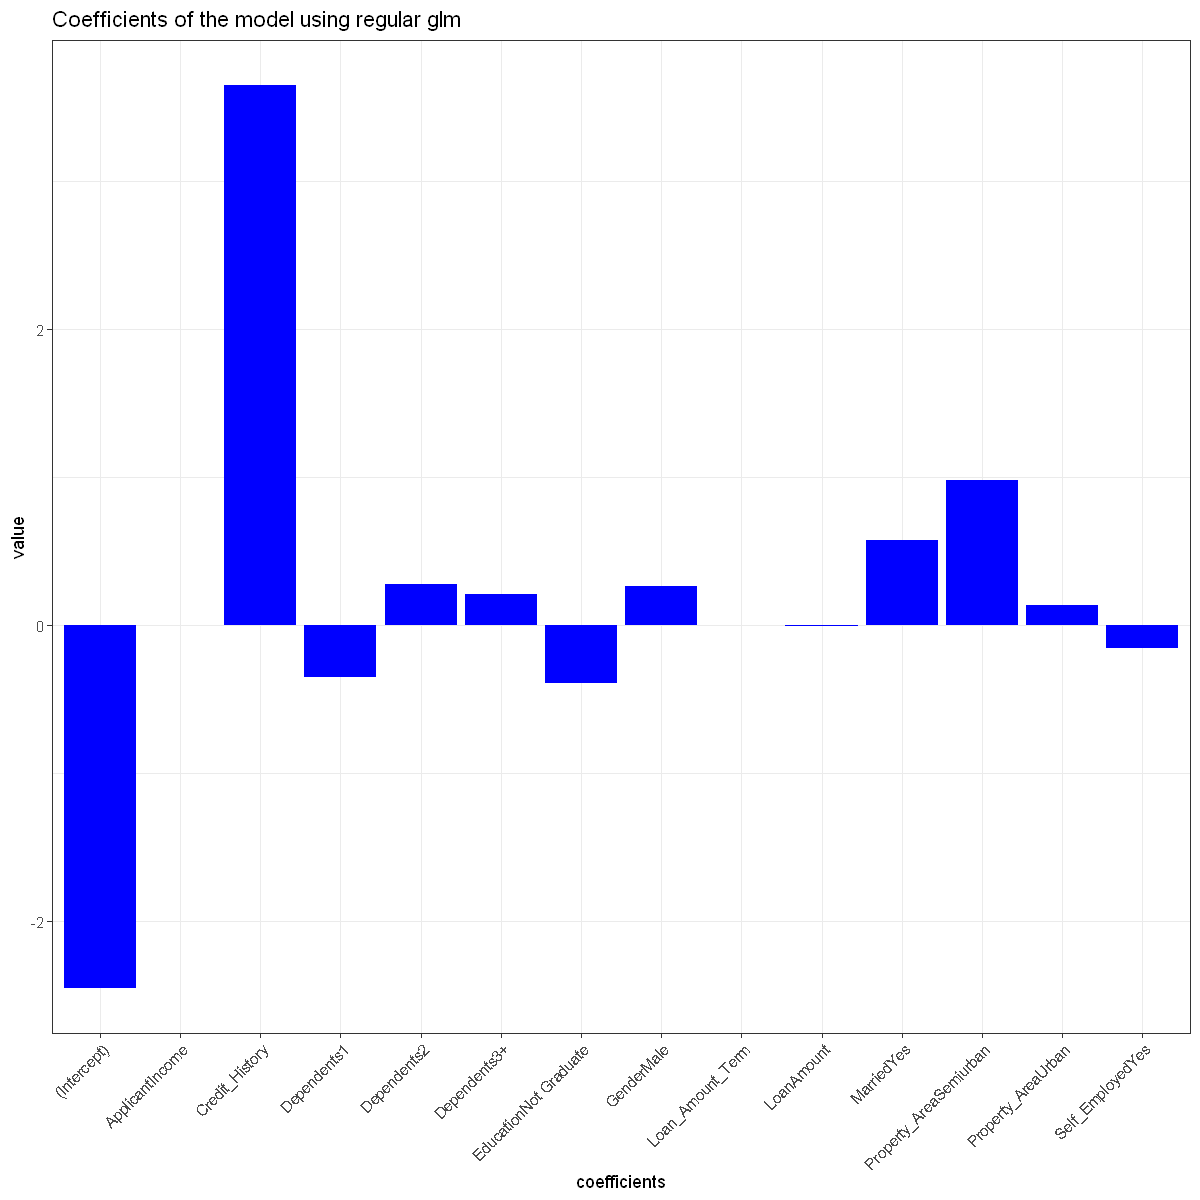

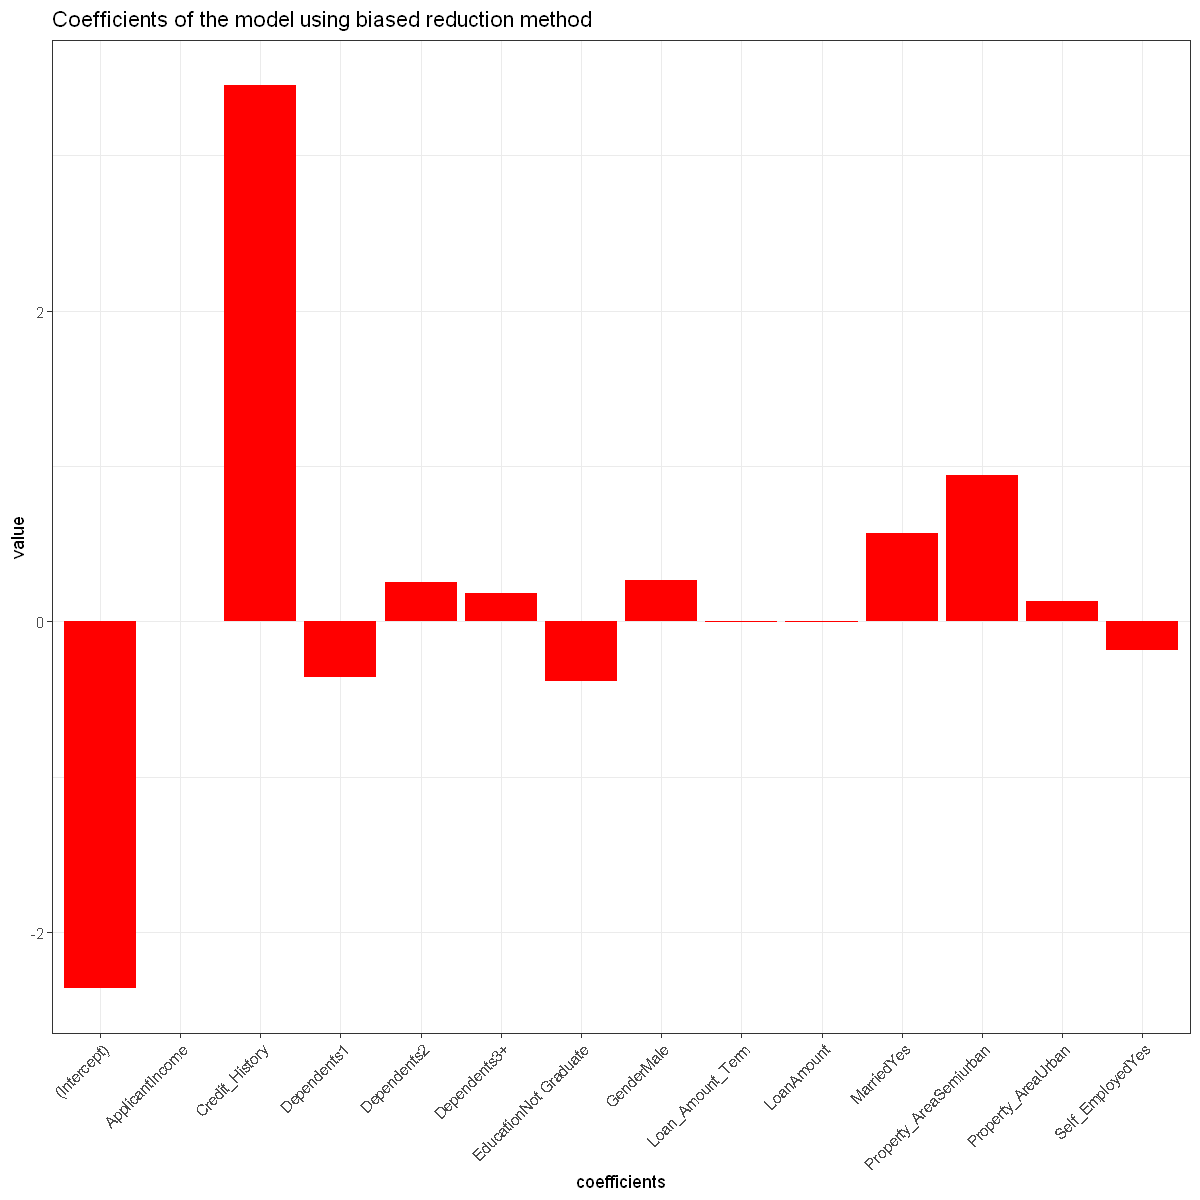

In [5]:
#Showing the coefficients 
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(coef_df) +
geom_bar(aes(x=coefficients, y=glm_value) , stat = "identity", fill="blue") +
theme_bw() + 
labs(x = "coefficients", y = "value", title = "Coefficients of the model using regular glm") +
theme(axis.text.x = element_text(angle = 45, hjust = 1))


ggplot(coef_df) +
geom_bar(aes(x=coefficients, y=pl_value) , stat = "identity", fill="red") +
theme_bw() + 
labs(x = "coefficients", y = "value", title = "Coefficients of the model using biased reduction method") +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

